# Training curves

This notebook compares training curves for models training with different settings.

In [1]:
import pickle

import matplotlib.pyplot as plt

In [2]:
models = {
    46329526: {"batch_size": None, "lr": 5e-5},
    46392623: {"batch_size": 1, "lr": 5e-5},
    46366551: {"batch_size": 4, "lr": 5e-5},
    46366895: {"batch_size": 8, "lr": 5e-5},
}

In [3]:
for jobid, infos in models.items():
    fname = f"../models/downscaling/model_{jobid}/metadata_model_{jobid}.pkl"
    with open(fname, "rb") as fd:
        infos["metadata"] = pickle.load(fd)

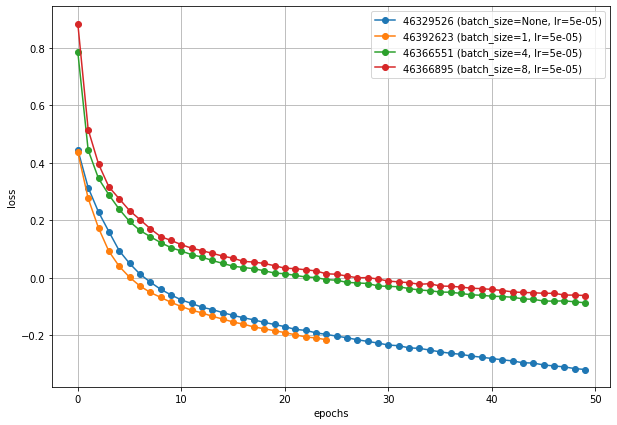

In [4]:
_, ax = plt.subplots(figsize=(10, 7))
for jobid, infos in models.items():
    label = f"{jobid} (batch_size={infos['batch_size']}, lr={infos['lr']})"
    ax.plot(infos["metadata"]["train_losses"], "-o", label=label)
ax.legend()
ax.grid()
ax.set_xlabel("epochs")
_ = ax.set_ylabel("loss")